## Introducción

<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
         </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Estadistica descriptiva del conjunto de Datos</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>CICLO: M3A</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Verónica Chimbo <span style="margin-left: 30px;"></span></div>
        </div>
        <div style="text-align:right;">Carrera: TECNOLOGÍA SUPERIOR EN BIG DATA <span style="margin-left: 30px;"></span></div>
         <div style="text-align:right;">Estudiante:Carlos Astudillo  <span style="margin-left: 30px;"></span></div>
          <div style="text-align:right;">Fecha: 17/6/2024 <span style="margin-left: 30px;"></span></div>
        </div>
    </div>
</div>
<!--/Header-->

El precio de venta de las viviendas depende de muchos factores, como la superfície construida, el número de habitaciones o la situación en que se encuentra. El conjunto de datos que usaremos en esta actividad corresponden al _dataset_ [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) que es una de las competiciones de iniciación de [Kaggle](www.kaggle.com). Contiene 79 variables con información de casi cada aspecto de las casas residenciales en la ciudad de Ames, Iowa.

Nuestro interés en esta actividad será aplicar métodos de estadística descriptiva y visualización de datos para ver qué variables están más relacionadas entre ellas y, en especial, con el precio de venta de una propiedad.
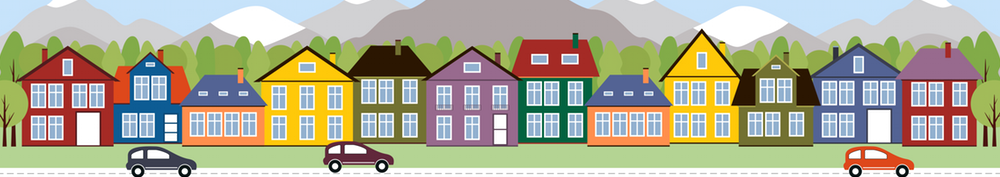

[DESCARGA DEL DATASET](https://drive.google.com/file/d/1zgvTvDeb-NcMm4gPjAu8nf7gzxRwCQuU/view?usp=share_link)

## Lectura y descripción del conjunto de datos

Lo primero que haremos, como siempre, será leer los datos y darles un vistazo.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_excel('/content/FINANCIAMIENTO-EDUCACION.xlsx')
df_train.head()

,ÍTEM,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"MINISTERIO DE EDUCACION (Y CULTURA, HASTA 2007)",854159098.77,9.375318e+08,1.083519e+09,1.344669e+09,SIN DATOS,SIN DATOS,2.009453e+09,2.492812e+09,2.674277e+09,3.225490e+09,3.190918e+09,2.803539e+09,2.784699e+09,3.213925e+09,3.335689e+09
1,EDUCACIÓN SUPERIOR SENACYT- SENESCYT,2050163.19,5.978021e+06,1.461910e+06,1.020203e+07,NaN,NaN,1.028007e+07,2.693050e+07,7.961056e+07,1.661424e+08,2.001034e+08,1.113520e+08,8.787045e+07,7.443288e+07,8.712530e+07
2,"CONSEJO DE EVALUACION, ACREDITACION Y ASEGURAM...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.238675e+05,5.064353e+06,7.320834e+06,7.883837e+06,7.831942e+06,5.480049e+06,5.612455e+06,5.277420e+06
3,CONSEJO NACIONAL DE EVALUACION Y ACREDITACION ...,NaN,NaN,NaN,NaN,NaN,NaN,1.428648e+06,9.184918e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CONSEJO NACIONAL DE EDUCACION SUPERIOR CONESUP...,NaN,NaN,NaN,NaN,NaN,NaN,5.859113e+06,NaN,2.437339e+06,5.771228e+06,8.294131e+06,7.807708e+06,6.803562e+06,6.014788e+06,5.153539e+06


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vemos que tenemos 81 columnas, la primera de las cuales es un identificador correlativo que no tiene valor informativo; y la última es el precio de venta.

In [36]:
df_train.columns

Index(['ÍTEM', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

## Diccionario de variables

A continuación adjuntamos el diccionario de variables con la explicación de que indica cada una y el rango de valores que tiene en caso de ser categórica.

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

### Valores no disponibles

Com vimos en la actividad de limpieza del conjunto de datos, miraremos qué variables tienen una cantidad alta de valores no disponibles.

In [37]:
# Calcular los valores faltantes
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

# Eliminar variables con más del 15% de valores faltantes
df_train = df_train[missing_data[missing_data['Percent'] < 0.15].index]

# Visualizar las primeras filas después de la eliminación
df_train.head()

,2012,ÍTEM
0,2.674277e+09,"MINISTERIO DE EDUCACION (Y CULTURA, HASTA 2007)"
1,7.961056e+07,EDUCACIÓN SUPERIOR SENACYT- SENESCYT
2,5.064353e+06,"CONSEJO DE EVALUACION, ACREDITACION Y ASEGURAM..."
3,NaN,CONSEJO NACIONAL DE EVALUACION Y ACREDITACION ...
4,2.437339e+06,CONSEJO NACIONAL DE EDUCACION SUPERIOR CONESUP...


from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['2012'].plot(kind='hist', bins=20, title='2012')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('ÍTEM').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='index', y='2012', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['2012']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ÍTEM')):
  _plot_series(series, series_name, i)
  fig.legend(title='ÍTEM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('2012')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ÍTEM')):
  _plot_series(series, series_name, i)
  fig.legend(title='ÍTEM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['2012'].plot(kind='line', figsize=(8, 4), title='2012')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['ÍTEM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='ÍTEM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['ÍTEM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='2012', y='ÍTEM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Eliminaremos aquellas variables con más del 15% de valores no disponibles, ya que pueden causar ruido en el análisis del conjunto de datos.

## Análisis univariante

El análisis univariante es la forma más sencilla de analizar datos. Se trata simplemente de considerar cada variable por separado, sumarizarla y analizar su distribución de valores.

Dentro del análisis univariante, separaremos variables numéricas y categóricas. Para las variables numéricas calcularemos el número de valores disponibles, la media, la desviación estándard, el mínimo, el máximo y los cuartiles, y analizaremos su distribución. En las variables categóriques veremos la distribución del sus valores en un histograma.

In [38]:
# Resumen estadístico de las variables numéricas
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
2012,93.0,1.689962e+09,9.950829e+09,0.0,268848.34,1917692.43,24903715.02,8.792454e+10


### Variables numéricas

La función `describe` nos permite hacer una descriptiva rápida de las variables de tipo numérico. En concreto, nos muestra la media, la desviación estándard, el mínimo, el màximo y los cuartiles de las variables.

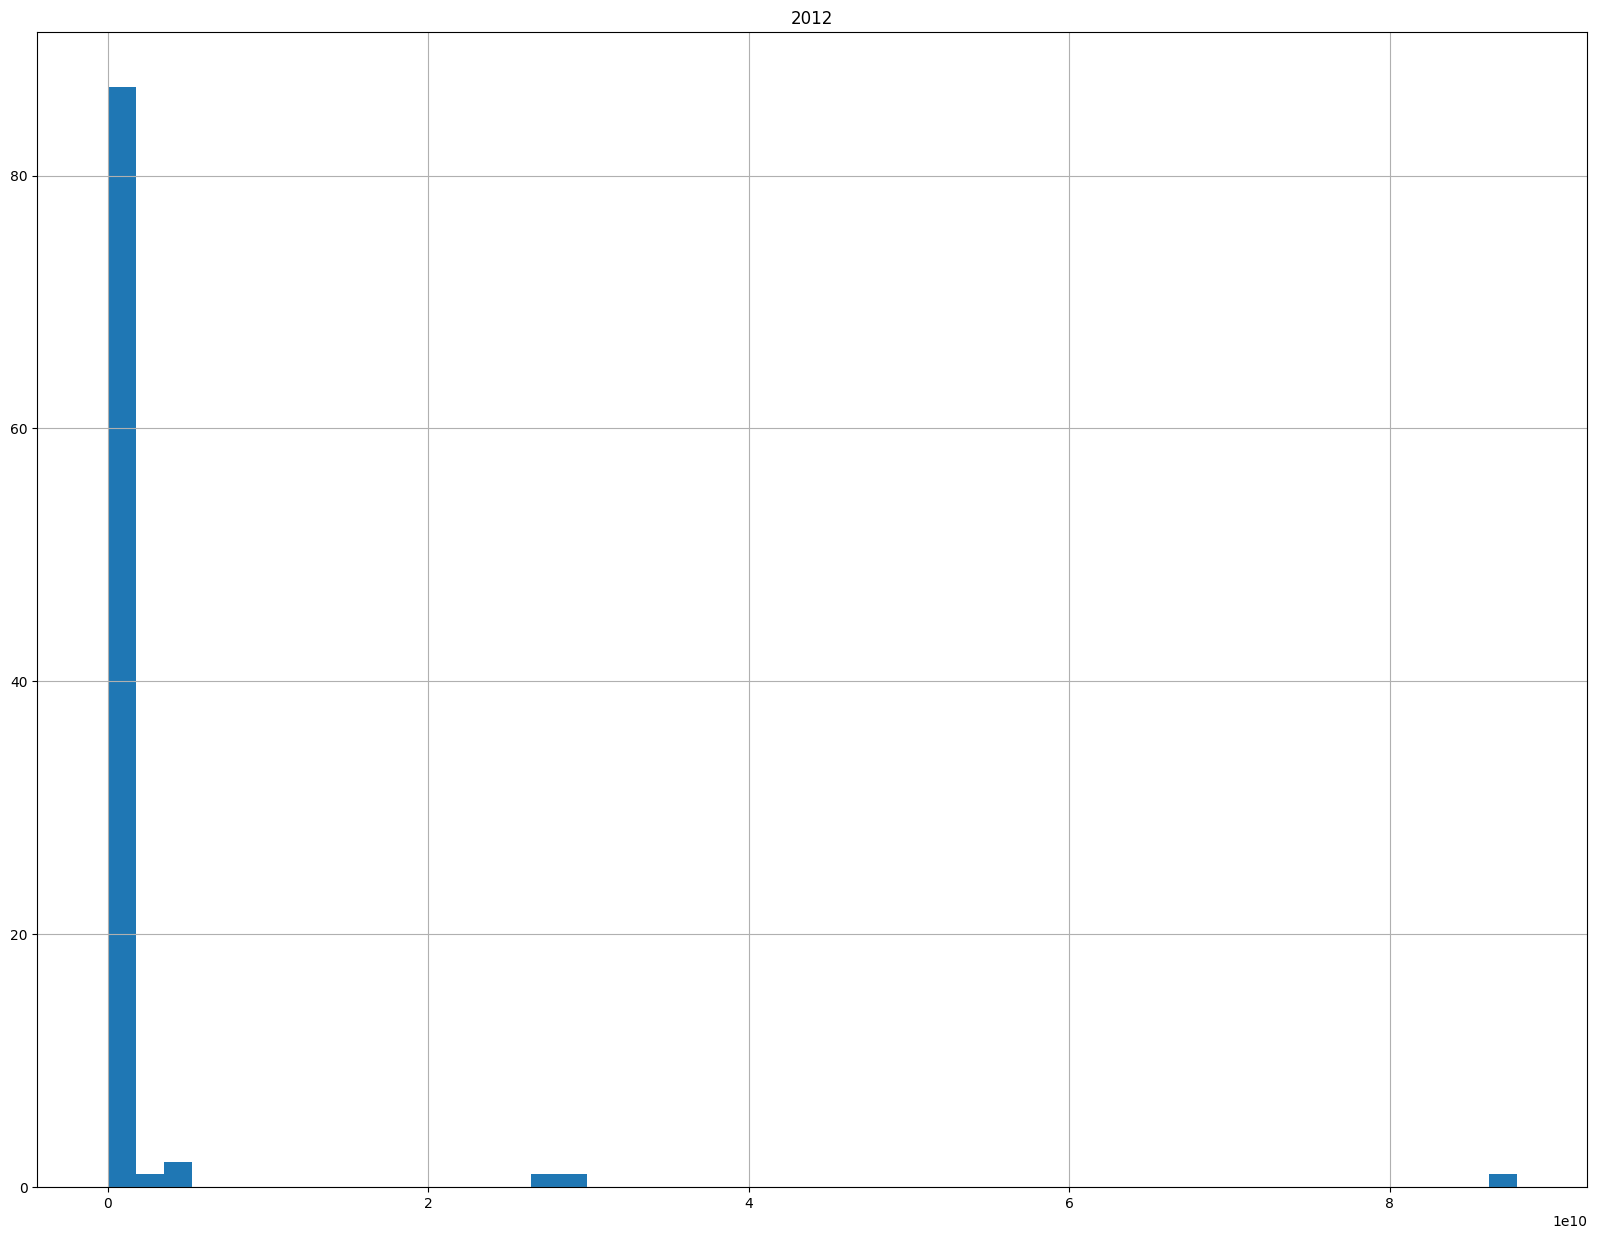

In [39]:
# Histograma de variables numéricas
df_train.hist(bins=50, figsize=(20,15))
plt.show()

Cada uno de estos cálculos estadísticos se pueden hacer individualmente, para todo el conjunto de datos. Las funciones disponibles en la librería `Pandas` son `count`, `mean`, `std`, `min`, `max` i `quantile`.

O bién para una sola variable.

In [42]:
print(df_train.columns)

Index(['2012', 'ÍTEM'], dtype='object')


#### Variable dependiente

Dentro de las variables numéricas prestaremos atención a la variable dependiente del análisis: el precio de venta.

<ipython-input-52-fcf2104003b8>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['2012'], fit=norm)


Skewness: 7.6528531817517305
Kurtosis: 63.53645483137625


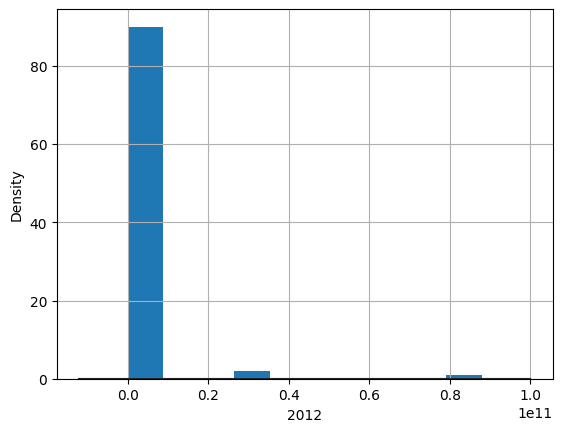

In [52]:
# Descripción de la variable 'SalePrice'
df_train['2012'].describe()

# Histograma de 'SalePrice'
df_train['2012'].hist()

# Distribución de 'SalePrice' comparada con la normal
from scipy.stats import norm
sns.distplot(df_train['2012'], fit=norm)

# Skewness y Kurtosis
print(f"Skewness: {df_train['2012'].skew()}")
print(f"Kurtosis: {df_train['2012'].kurt()}")

#### Distribución de la variable e histograma

Podemos visualizar su distribución de la variable con un histograma.

<Axes: >

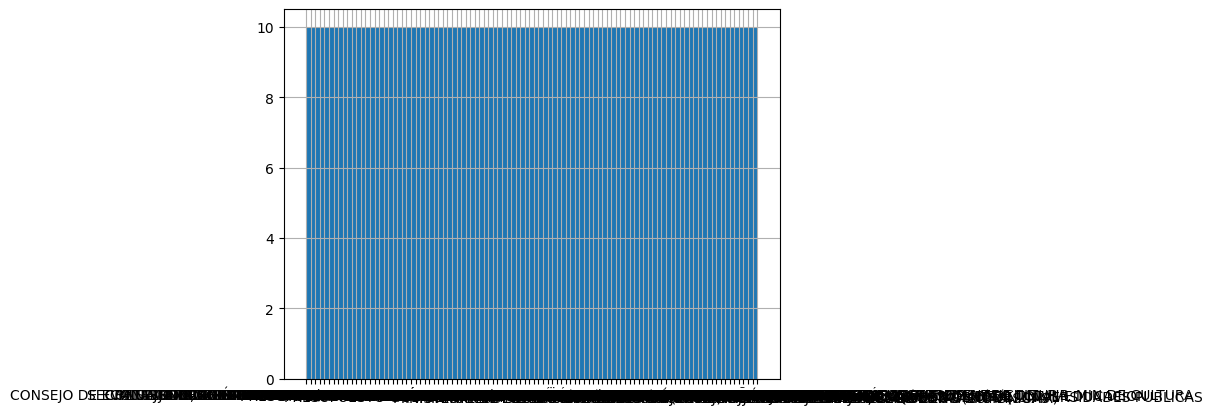

In [49]:
df_train['ÍTEM'].hist()

#### Test de normalidad

Si observamos los valores mínimo, medio y máximo vemos claramente que no es una variable con distribución normal. En la mayoría de modelos numéricos de aprendizaje automático, necesitaremos que las variables sigan la distribución normal.

Con la función `distplot` de la librería de visualización `Seaborn` podemos comparar la distribución de nuestra variable con la normal.

<ipython-input-59-3b933e1439e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['2012'], fit = norm)


<Axes: xlabel='2012', ylabel='Density'>

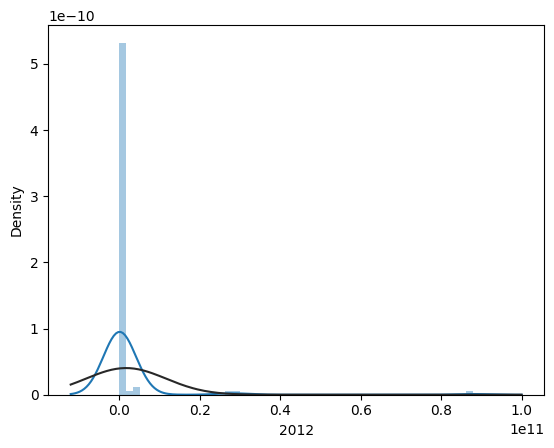

In [59]:
from scipy.stats import norm
sns.distplot(df_train['2012'], fit = norm)

De una forma numérica pero menos visual podemos calcular dos indicadores de normalidad. La asimetría de la función o _skewness_ y el _kurtosis_.

La función `skew` calcula el coeficiente de asimetría. Si es positivo y mayor que uno, como en nuestro caso, los valores de la distribución són más densos hacia la izquierda del gráfico. En una distribución normal, el coeficiente de asimetría sería cercano a cero.

In [56]:
df_train['2012'].skew()

7.6528531817517305

La función `kurtosis` nos da una idea de la relación del pico central con los extremos de la campana de la distribución. Si es cercano a 1, el valor será coherente con la normalidad de la variable. En nuestro caso, se encuentra bastante lejos.

In [57]:
df_train['2012'].kurt()

63.53645483137625

Cuando nos encontramos una variable que no es normal, una de las transformaciones clásicas que puede funcionar es aplicar el logaritmo a la variable.

<ipython-input-61-a9a1912d59c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['2012'], fit = norm)


<Axes: xlabel='2012', ylabel='Density'>

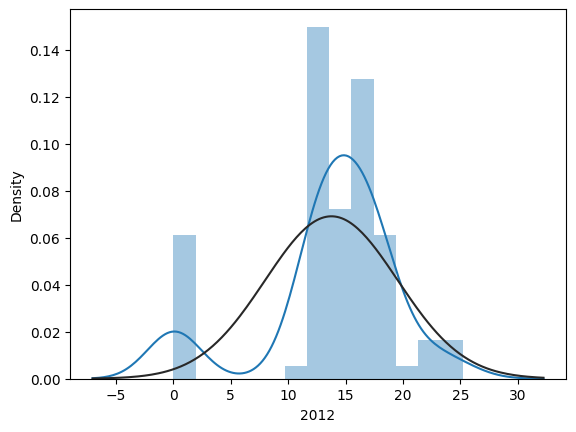

In [61]:
df_train['2012'] = np.log1p(df_train['2012'])
sns.distplot(df_train['2012'], fit = norm)

Vemos como ahora sí que tiene forma normal. Lo comprobamos con los métodos estadísticos para confirmarlo.

In [62]:
df_train['2012'].skew()

-1.2003356509138952

In [63]:
df_train['2012'].kurt()

1.4605731009355227

### Variables categóricas

El otro tipo de variables que tenemos son las variables categóricas. Analizaremos la variable que identifica la calificación del habitaje.

<Axes: xlabel='2012'>

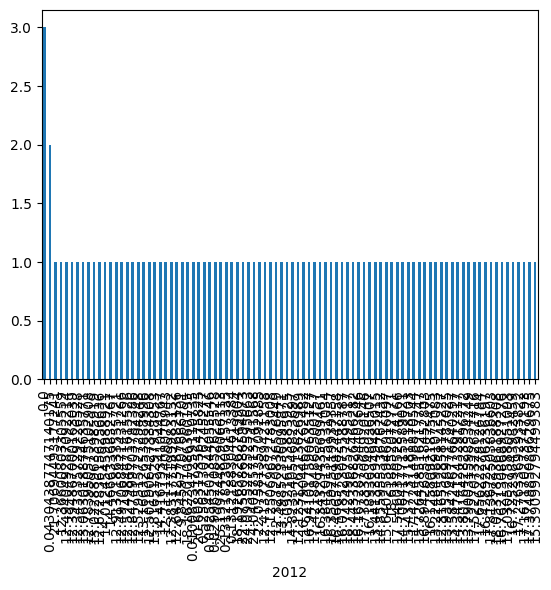

In [70]:
df_train['2012'].value_counts().plot(kind='bar')

## Análisis bivariante

Para analizar un conjunto de datos debemos tener en cuenta más de una variable a la vez. El análisis bivariante permite identificar las relaciones entre dos variables, y hasta ver de qué forma una puede predecir la otra.

En este caso podem ver cuál es la relación entre el precio de venta y la superfície construida con un _scatter plot_ o diagrama de puntos.

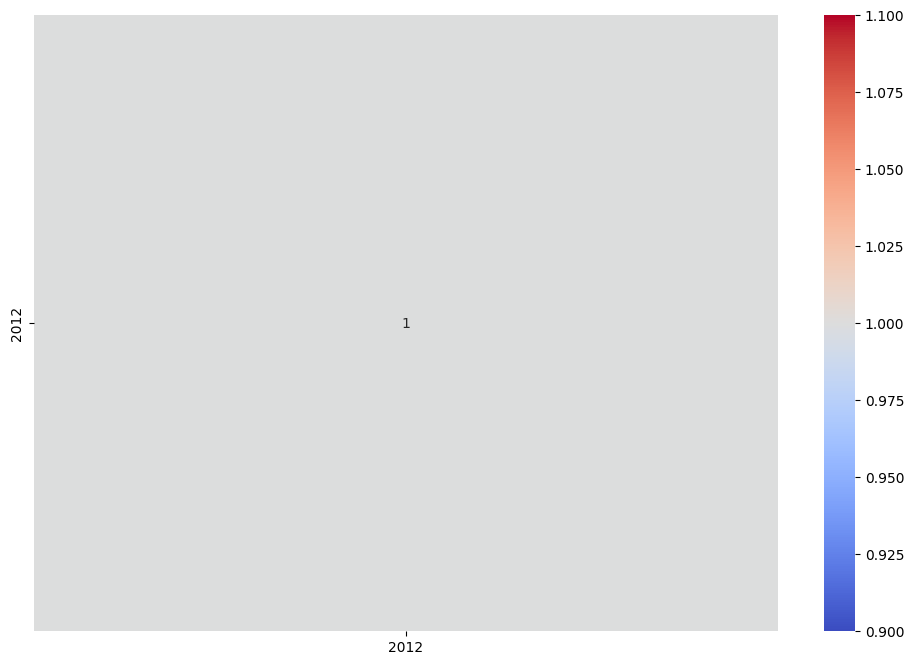

In [78]:
# Matriz de correlación
corr_matrix = df_train.select_dtypes(include=['number']).corr() # Select only numerical columns

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

En el caso de una variable categórica como la calificación, podemos visualizar la relación con un _boxplot_ o diagrama de cajas.

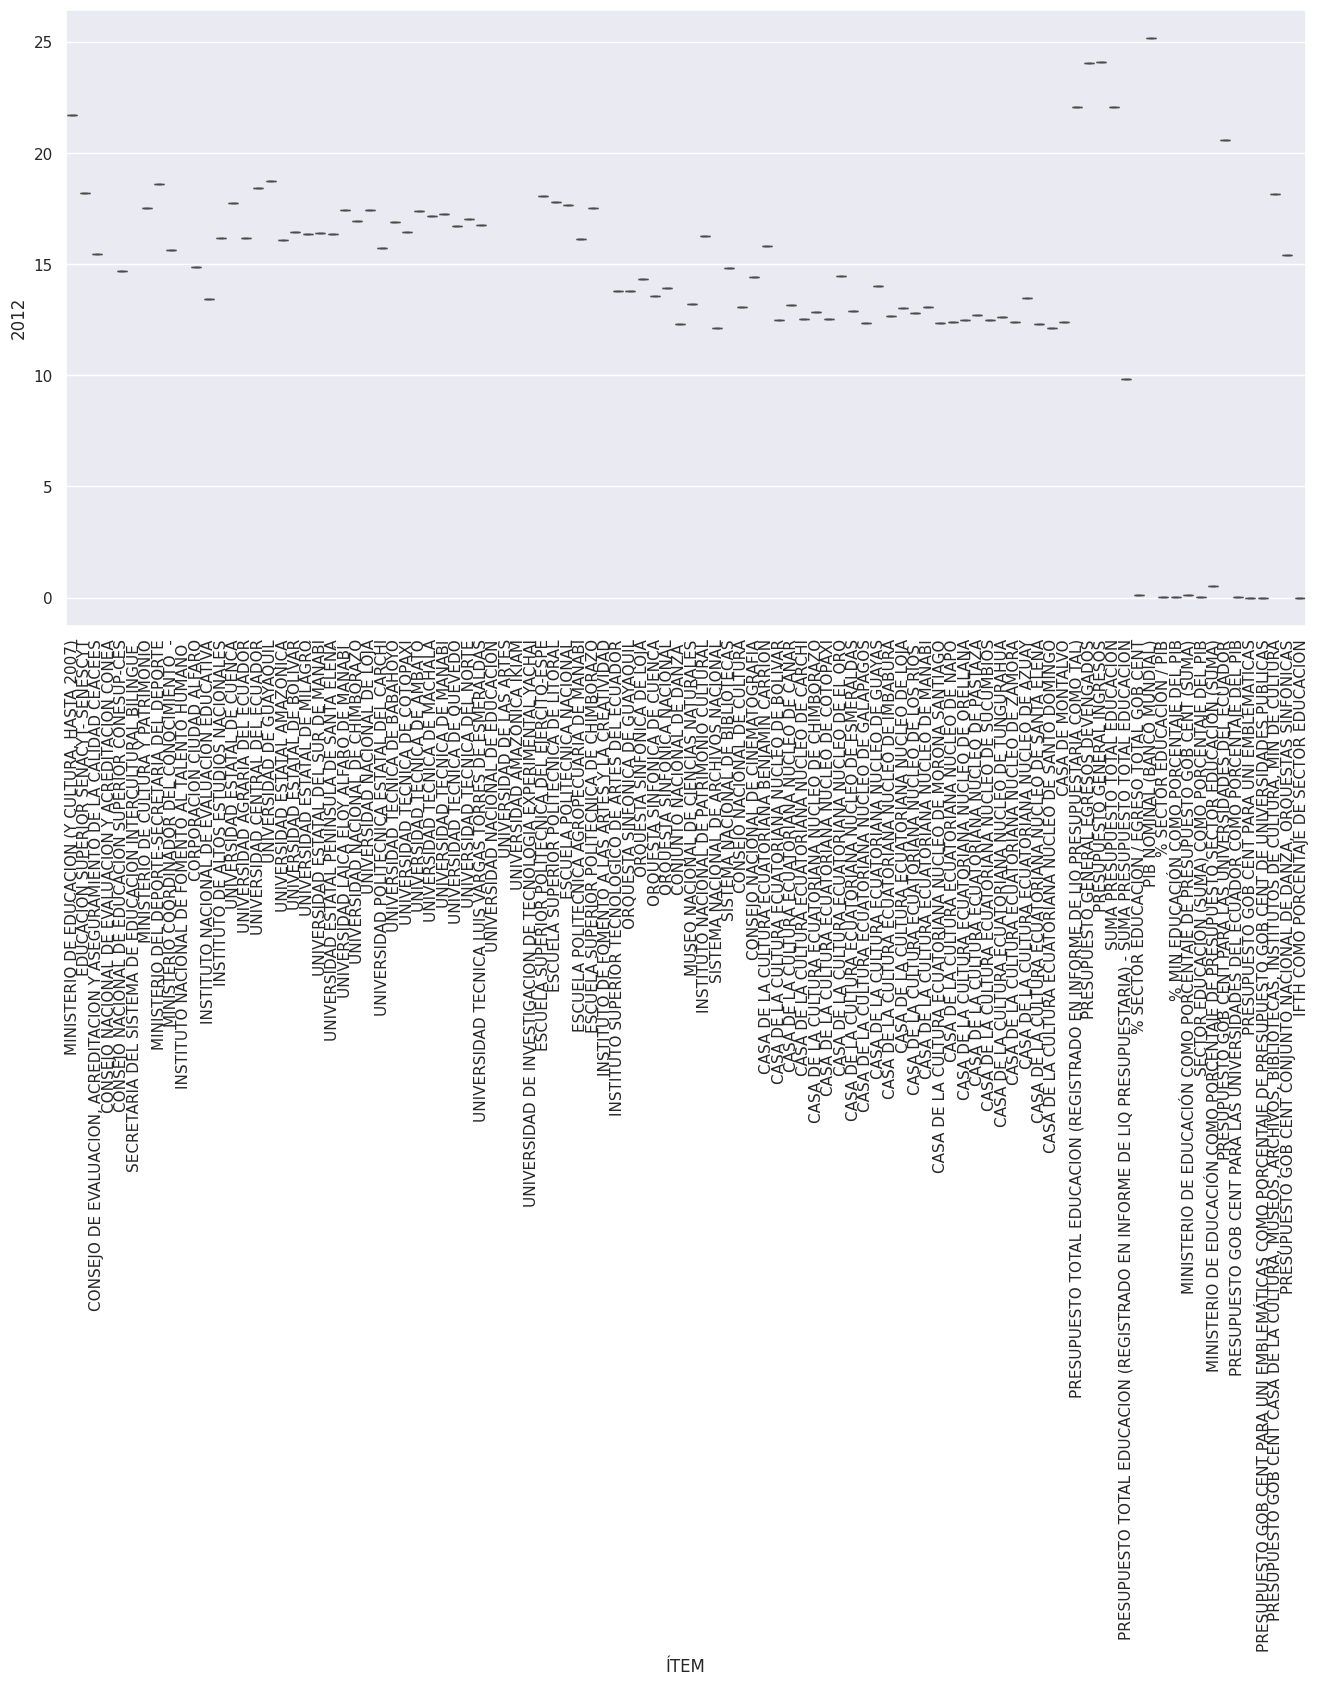

In [85]:
if '2012' in df_train.columns:
    var = 'ÍTEM'
    data = pd.concat([df_train['2012'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="2012", data=data)
    plt.xticks(rotation=90);
else:
    print("Column '2012' not found in df_train. Please check your DataFrame.")

<Axes: xlabel='ÍTEM', ylabel='2012'>

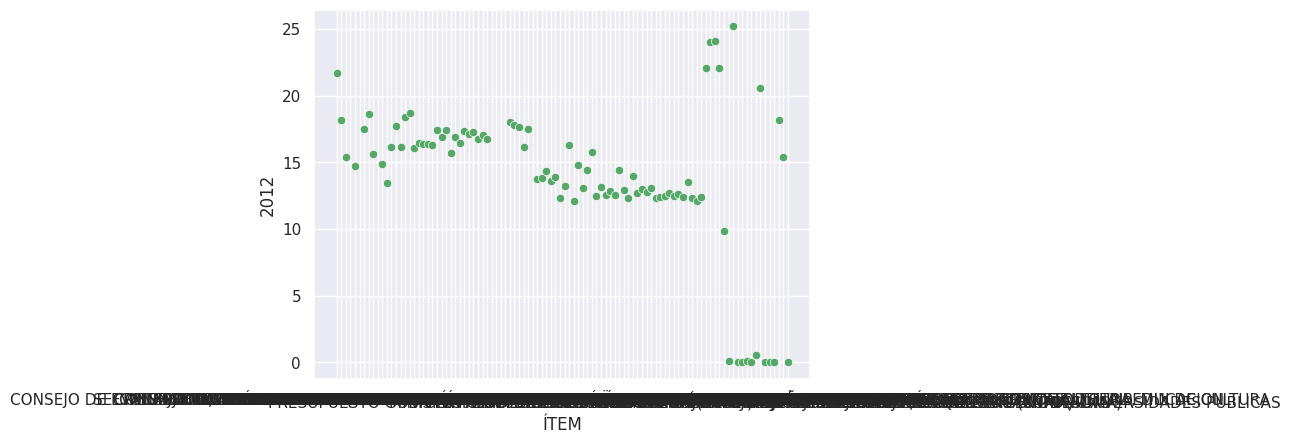

In [87]:
sns.scatterplot(x='ÍTEM', y='2012', data=df_train)

sns.scatterplot(x='ÍTEM', y='2012', data=df_train)

sns.scatterplot(x='ÍTEM', y='2012', data=df_train)

Si queremos visualizar a la vez las relaciones cruzadas entre varias variables, podemos hacer un _pairplot_.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


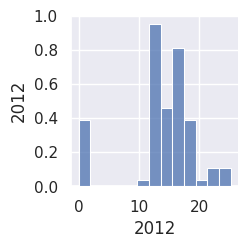

In [89]:
sns.set()
cols = ['2012', 'ÍTEM']
missing_cols = [col for col in cols if col not in df_train.columns]

if missing_cols:
    print(f"The following columns are missing in df_train: {missing_cols}")
else:
    sns.pairplot(df_train[cols], size=2.5)
    plt.show()

## Análisis multivariante

Finalmente, nos interessará ver qué conjuntos de variables estan relacionadas entre sí. Para ello, usaremos técnicas estadísticas de análisis multivariante.

Una de las herramientas más útiles es calcular la matriz de correlación entre las variables. Con la función `heatmap` podemos visualizar de manera sencilla aquellas variables más correlacionadas, que corresponden a una intensidad mayor de color.

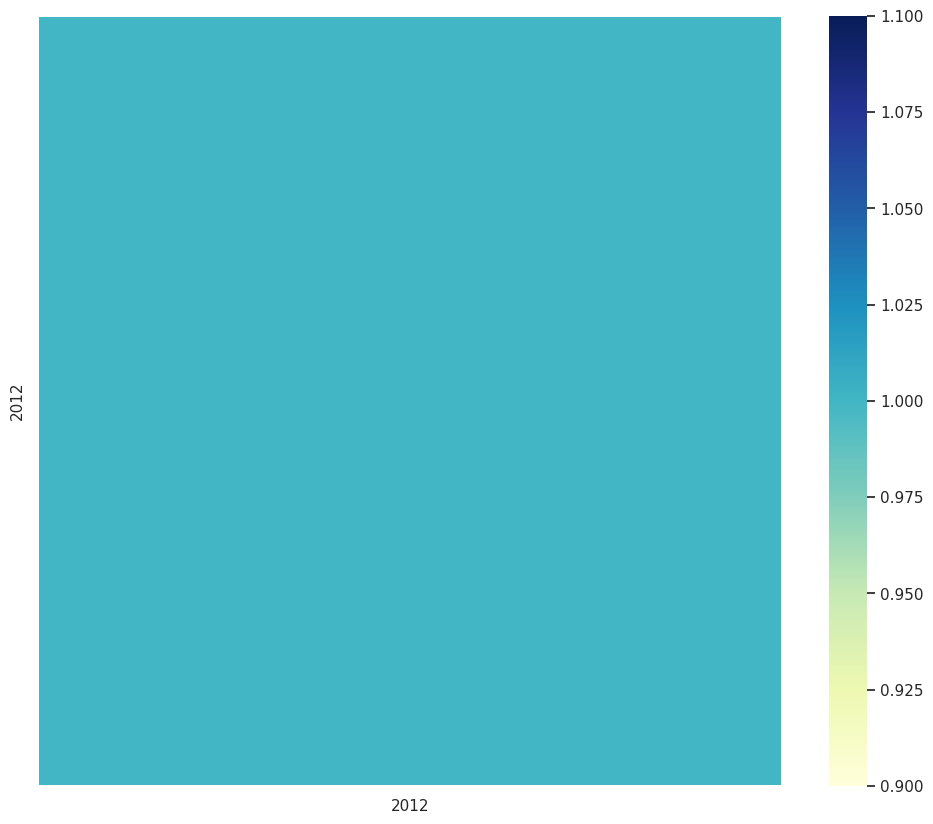

In [98]:
# Convert the '2012' column to numeric type if it contains numerical strings
df_train['2012'] = pd.to_numeric(df_train['2012'], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

# Fill NaN values in the '2012' column with a suitable value (e.g., 0)
df_train['2012'] = df_train['2012'].fillna(0)  # Replace NaN with 0, adjust as needed

# Explicitly select only numeric columns for correlation calculation
numeric_df = df_train.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric DataFrame
corrmat = numeric_df.corr(method='pearson')  # Use a valid correlation method like 'pearson'

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)  # Use a valid colormap like 'YlGnBu'
plt.show()

El `clustermap` nos permite ir un paso más allá y agrupar las variables que tienen más relación entre ellas, a partir de un algoritmo de _clustering_ a partir de la información de la correlación. Esto nos servirá eventualmente, para evitar escojer datos muy correlacionados que nos puedan perjudicar en el momento de aplicar un modelo.

Vemos, por ejemplo, que las variables `YearBuilt`, `GarageYrBlt` y `YearRemodAdd` están muy correlacionadas y nos dan casi la misma informacion. En la fase de modelado, escogeremos sólo una de las tres.

In [105]:
# Calculate the correlation matrix using a valid method (e.g., 'pearson')
# Select only numeric columns before calculating correlation
numeric_df = df_train.select_dtypes(include=['number'])
if numeric_df.shape[1] > 1:  # Check if there are at least 2 numeric columns
    corrmat = numeric_df.corr(method='pearson')

    # Create the clustermap
    cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);

    # Rotate y-axis labels for better readability
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

    # Display the plot
    cg
else:
    print("Not enough numeric columns found in DataFrame. Cannot create clustermap.")

Not enough numeric columns found in DataFrame. Cannot create clustermap.


Finalmente, escogeremos las 15 variables más correlacionadas con el precio de venta del habitaje, y mostraremos la correlación.

In [112]:
k = 15 #number of variables for heatmap
# Calculate correlation on the entire DataFrame to include 'SalePrice'
# Select only numeric columns before calculating correlation
numeric_df = df_train.select_dtypes(include=['number'])
corrmat_all = numeric_df.corr(method='pearson')

# Ensure you select at least two columns for correlation
cols = corrmat_all.nlargest(k, '2012')['2012'].index
if len(cols) > 1:
    cm = np.corrcoef(df_train[cols].values.T)
    f, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")

Not enough numeric columns for correlation heatmap.
